In [1]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('dataset/full_dataset.csv')

In [2]:
df.shape

(2231142, 7)

## Clustering wrt to Ingredients

In [3]:
df.head(5)

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [4]:
import torch
import pandas as pd
import torchtext
from torchtext.data.utils import get_tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [5]:
# Create a TfidfVectorizer object to convert the ingredients into a feature matrix
vectorizer = TfidfVectorizer(stop_words="english")

df_sample = df.head(100000)

# Create a feature matrix
X = vectorizer.fit_transform(df_sample['ingredients'])

In [6]:
X.shape

(100000, 6608)

In [29]:
vectorizer.get_feature_names_out()

array(['000', '07', '0z', ..., 'zucchinis', 'zuke', 'zwieback'],
      dtype=object)

In [30]:
from sklearn.metrics import silhouette_score

cluster_sizes = range(2, 10)
silhouette_scores = []

for size in cluster_sizes:
    kmeans = KMeans(n_clusters=size, random_state=0).fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

/Users/aybarsyazici/Documents/GenAI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aybarsyazici/Documents/GenAI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aybarsyazici/Documents/GenAI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aybarsyazici/Documents/GenAI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

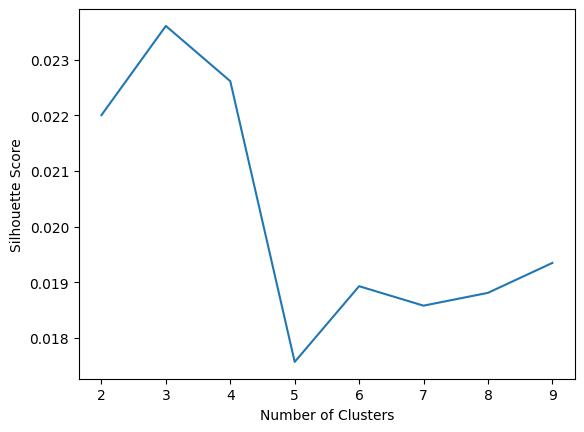

In [32]:
import matplotlib.pyplot as plt

plt.plot(cluster_sizes, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [33]:
# get the most optimal number of clusters
optimal_num_clusters = cluster_sizes[np.argmax(silhouette_scores)]
# cluster the data
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0).fit(X)
# assign the labels to df_sample
df_sample['cluster'] = kmeans.labels_

/Users/aybarsyazici/Documents/GenAI/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/jt/f2yqrnv562q34hfjkkskqwzw0000gn/T/ipykernel_853/3439224054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['cluster'] = kmeans.labels_


In [38]:
# print some recipes from each cluster
for i in range(optimal_num_clusters):
    print(f"Cluster {i}")
    display(df_sample[df_sample['cluster'] == i]['ingredients'].head(5))
    print()

Cluster 0


1    ["1 small jar chipped beef, cut up", "4 boned ...
2    ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...
3    ["1 large whole chicken", "2 (10 1/2 oz.) cans...
5    ["6 baking potatoes", "1 lb. of extra lean gro...
8    ["1 1/2 lb. round steak (1-inch thick), cut in...
Name: ingredients, dtype: object


Cluster 1


6     ["1 1/2 c. sugar", "1/2 c. butter", "1 egg", "...
19    ["3/4 c. sugar", "1/2 c. shortening", "1 1/2 c...
20    ["1 c. sugar", "1/2 c. shortening", "2 eggs (a...
41    ["3 Tbsp. softened butter or margarine", "1/2 ...
42    ["5 c. flour", "3 Tbsp. sugar", "4 tsp. baking...
Name: ingredients, dtype: object


Cluster 2


0     ["1 c. firmly packed brown sugar", "1/2 c. eva...
4     ["1 c. peanut butter", "3/4 c. graham cracker ...
7     ["1 can cream-style corn", "1 can whole kernel...
9     ["1 large container Cool Whip", "1 large can c...
10    ["1 (17 oz.) can dark sweet pitted cherries", ...
Name: ingredients, dtype: object

## Association Rule Mining

In [3]:
# Load the dataset
df_sample2 = df.copy()

# Convert the ingredients column to a list of lists
transactions = df_sample2['directions'].to_numpy().tolist()

In [4]:
transactions = [eval(x) for x in transactions]

In [5]:
import nltk
from nltk.corpus import stopwords
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

transactions_word_scale = []
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

for transaction in transactions:
    recipe = []
    for sentence in transaction:
        # remove stop words and tokenize
        tokens = tokenizer.tokenize(sentence)
        # convert to lowercase, remove punctuation, and remove stop words
        tokens = [word.lower() for word in tokens if word.isalpha() and not word in stop_words]
        recipe += tokens
    transactions_word_scale.append(recipe)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aybarsyazici/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Create a TransactionEncoder object to convert the list of lists into a one-hot encoded matrix
te = TransactionEncoder()
transactions_one_hot = te.fit(transactions_word_scale).transform(transactions_word_scale, sparse=True)

In [7]:
# # Since the kernel crashes trying to transform all of the data,
# # We do it in batches of 10000
# from tqdm.notebook import tqdm

# batch_size = 10000
# num_batches = len(transactions_word_scale) // batch_size + 1
# transactions_one_hot = []
# for batch in tqdm(range(num_batches)):
#     print(f"Batch {batch + 1} of {num_batches}")
#     transactions_one_hot += te.transform(transactions_word_scale[batch * batch_size:(batch + 1) * batch_size], sparse=True)

In [8]:
# te_ary_word_scale = te.transform(transactions_word_scale)
df_word_scale = pd.DataFrame.sparse.from_spmatrix(transactions_one_hot, columns=te.columns_)

/var/folders/jt/f2yqrnv562q34hfjkkskqwzw0000gn/T/ipykernel_30776/1926944183.py:2: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df_word_scale = pd.DataFrame.sparse.from_spmatrix(transactions_one_hot, columns=te.columns_)


In [9]:
# Apply the Apriori or fpgrowth algorithm to the one-hot encoded matrix to extract frequent itemsets
# frequent_itemsets = fpgrowth(df_sentence_scale, min_support=0.01, use_colnames=True, max_len=5)

# frequent_itemsets.sort_values(by='support', ascending=False).head(10)

In [10]:
frequent_itemsets_word = fpgrowth(df_word_scale, min_support=0.1, use_colnames=True)

In [11]:
display(frequent_itemsets_word.sort_values(by='support', ascending=True).head(10))

frequent_itemsets_word.sort_values(by='support', ascending=False).head(10)

,support,itemsets
365,0.100006,"(pepper, serve)"
302,0.100080,"(bake, cheese)"
98,0.100103,"(salt, stir, add, minutes)"
459,0.100282,"(remove, place)"
509,0.100347,"(bake, oven, mixture)"
456,0.100373,"(remove, mixture)"
210,0.100419,"(heat, add, boil)"
262,0.100454,"(bake, cream)"
461,0.100475,"(remove, medium)"
425,0.100499,"(water, mix)"


,support,itemsets
40,0.585701,(add)
0,0.585341,(minutes)
1,0.405614,(mix)
17,0.386248,(bake)
78,0.377138,"(add, minutes)"
2,0.358704,(heat)
41,0.355899,(salt)
3,0.326426,(stir)
65,0.325843,(bowl)
4,0.314417,(mixture)


In [12]:
# Apply association rule mining to extract rules between frequent itemsets
rules = association_rules(frequent_itemsets_word, metric="lift", min_threshold=0.1)

# Print the top 5 rules by lift
display(rules.sort_values(by="lift", ascending=False).head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1204,(aside),(set),0.111550,0.164120,0.109089,0.977938,5.95869,0.090781,37.886955,0.936663
1205,(set),(aside),0.164120,0.111550,0.109089,0.664692,5.95869,0.090781,2.649655,0.995570
1569,(boil),(bring),0.169523,0.141653,0.122820,0.724499,5.11462,0.098806,3.115588,0.968699
1568,(bring),(boil),0.141653,0.169523,0.122820,0.867048,5.11462,0.098806,6.246451,0.937245
1606,"(bake, preheat)","(oven, minutes)",0.125604,0.215356,0.110728,0.881562,4.09351,0.083678,6.624947,0.864266


In [13]:
rules[rules.lift >= 2].shape

(242, 10)

### Confidence

> The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together. 

### Leverage

> Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. A leverage value of 0 indicates independence.

### Lift

> The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

> A lift score greater than 1 indicates a positive association, meaning that the occurrence of one item increases the likelihood of the occurrence of the other item. A lift score less than 1 indicates a negative association, meaning that the occurrence of one item decreases the likelihood of the occurrence of the other item.

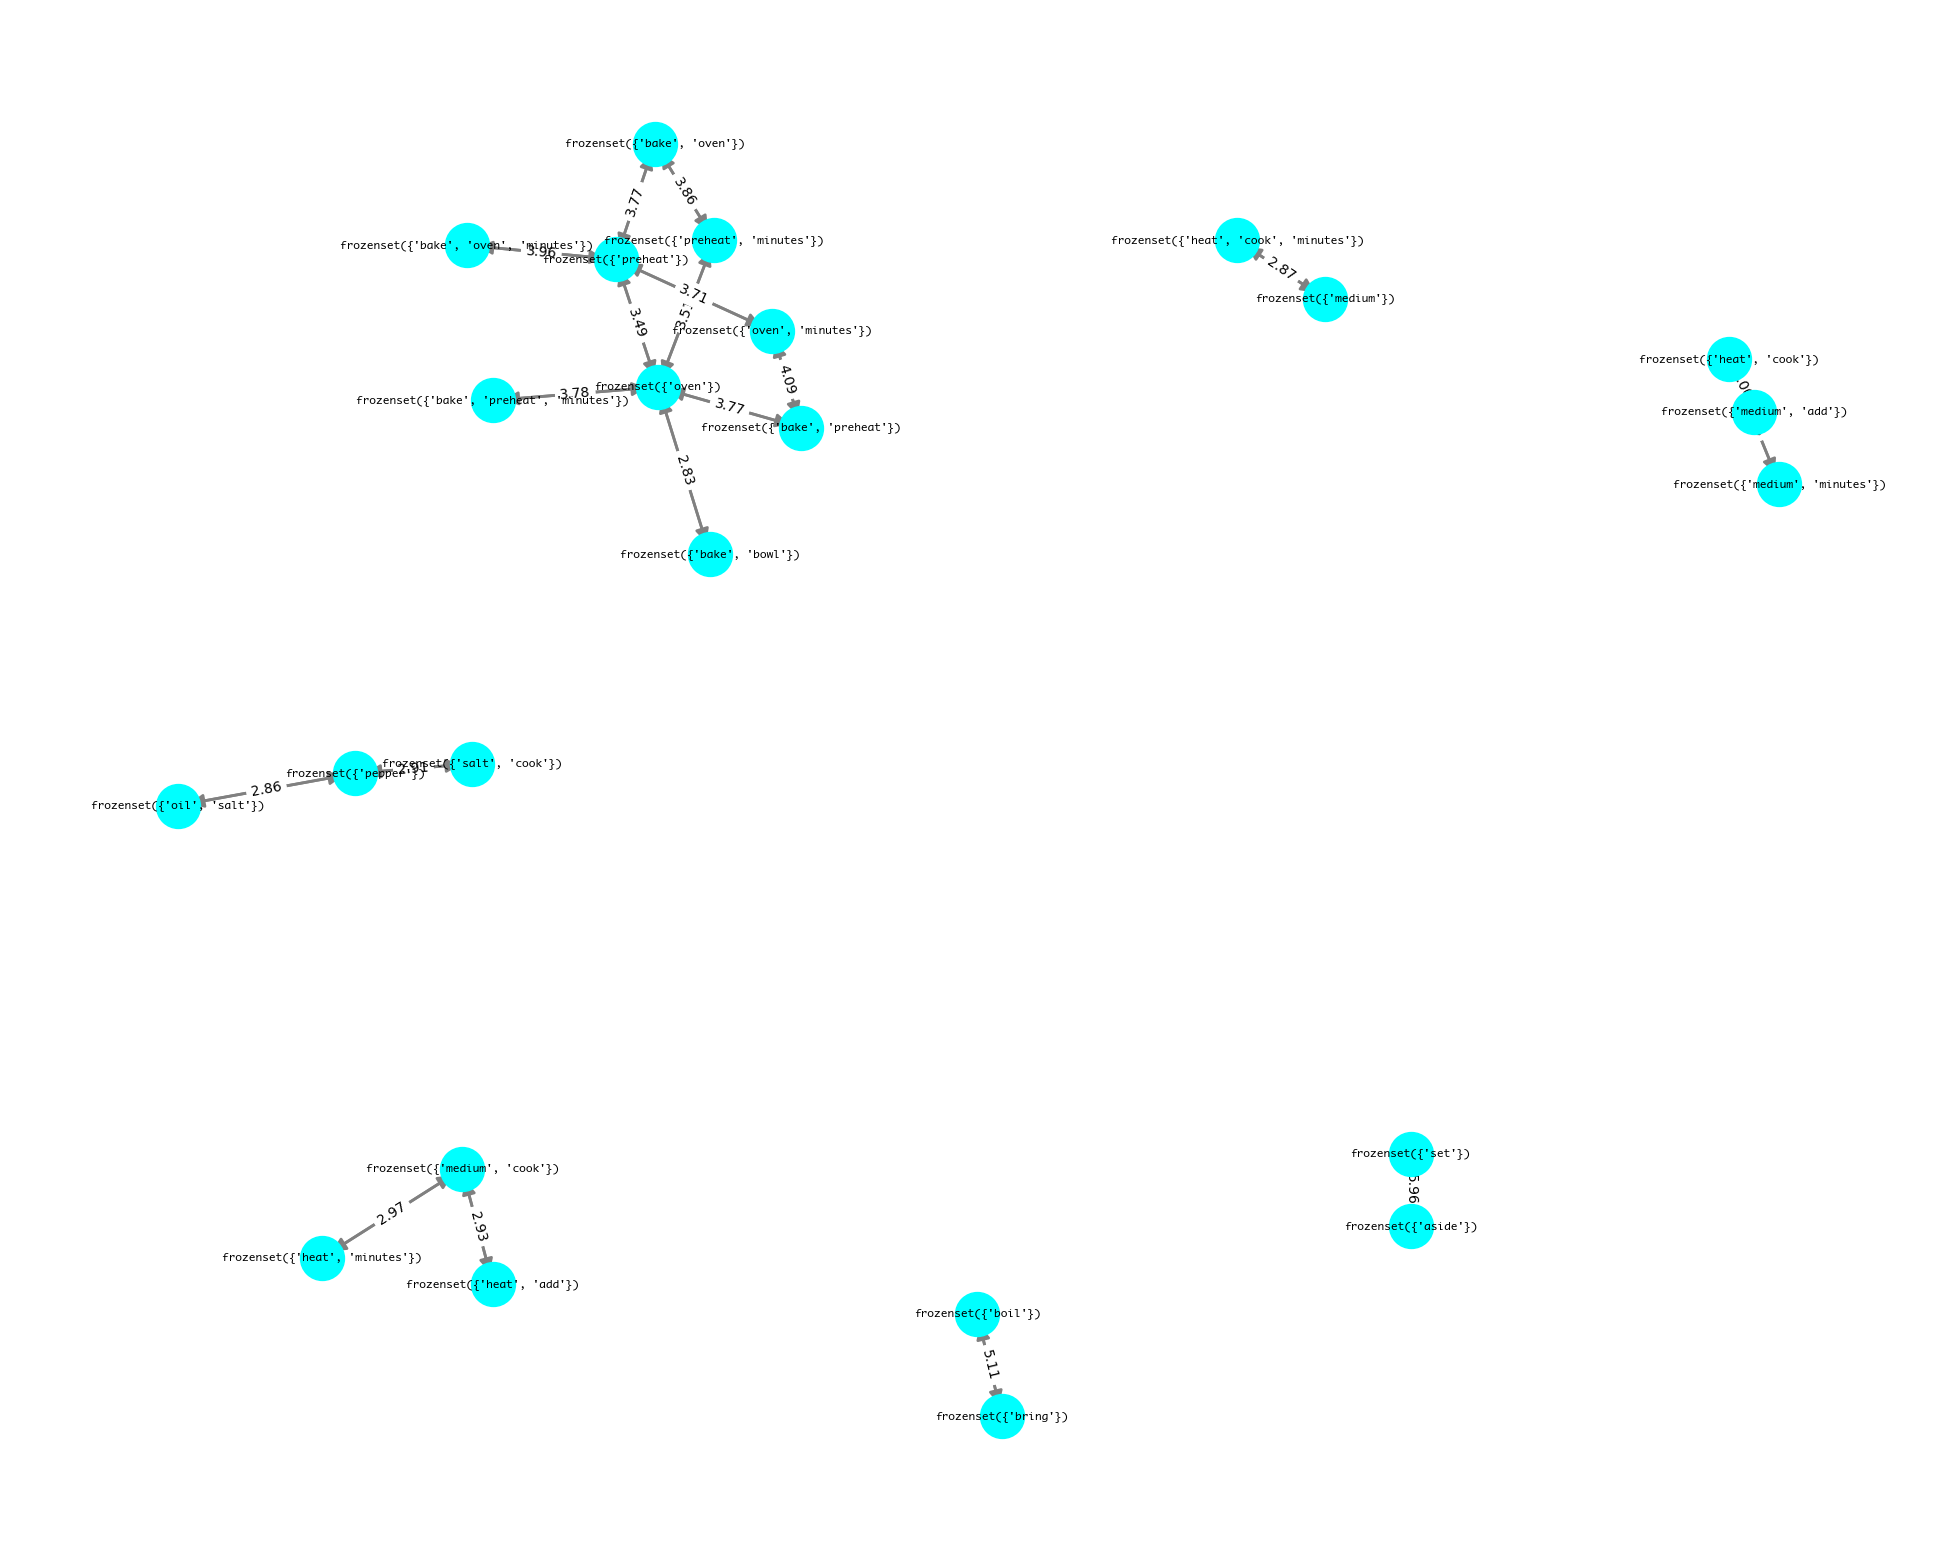

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a network graph of the association rules

# Only consider rules with lift greater than X
filtered_rules = rules[rules.lift >= 2.75]

G = nx.DiGraph()
for i in range(len(filtered_rules)):
    # add edge with an arrow from antecedents to consequents
    G.add_edge(filtered_rules.iloc[i]['antecedents'], filtered_rules.iloc[i]['consequents'], weight=filtered_rules.iloc[i]['lift'])

# make the graph bigger
plt.figure(figsize=(25, 20))
# Draw the network graph
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="cyan")
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="Monaco")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{w:.2f}" for u, v, w in G.edges(data="weight")})
plt.axis("off")
plt.show()

In [66]:
from nx_draw_helper import my_draw_networkx_edge_labels

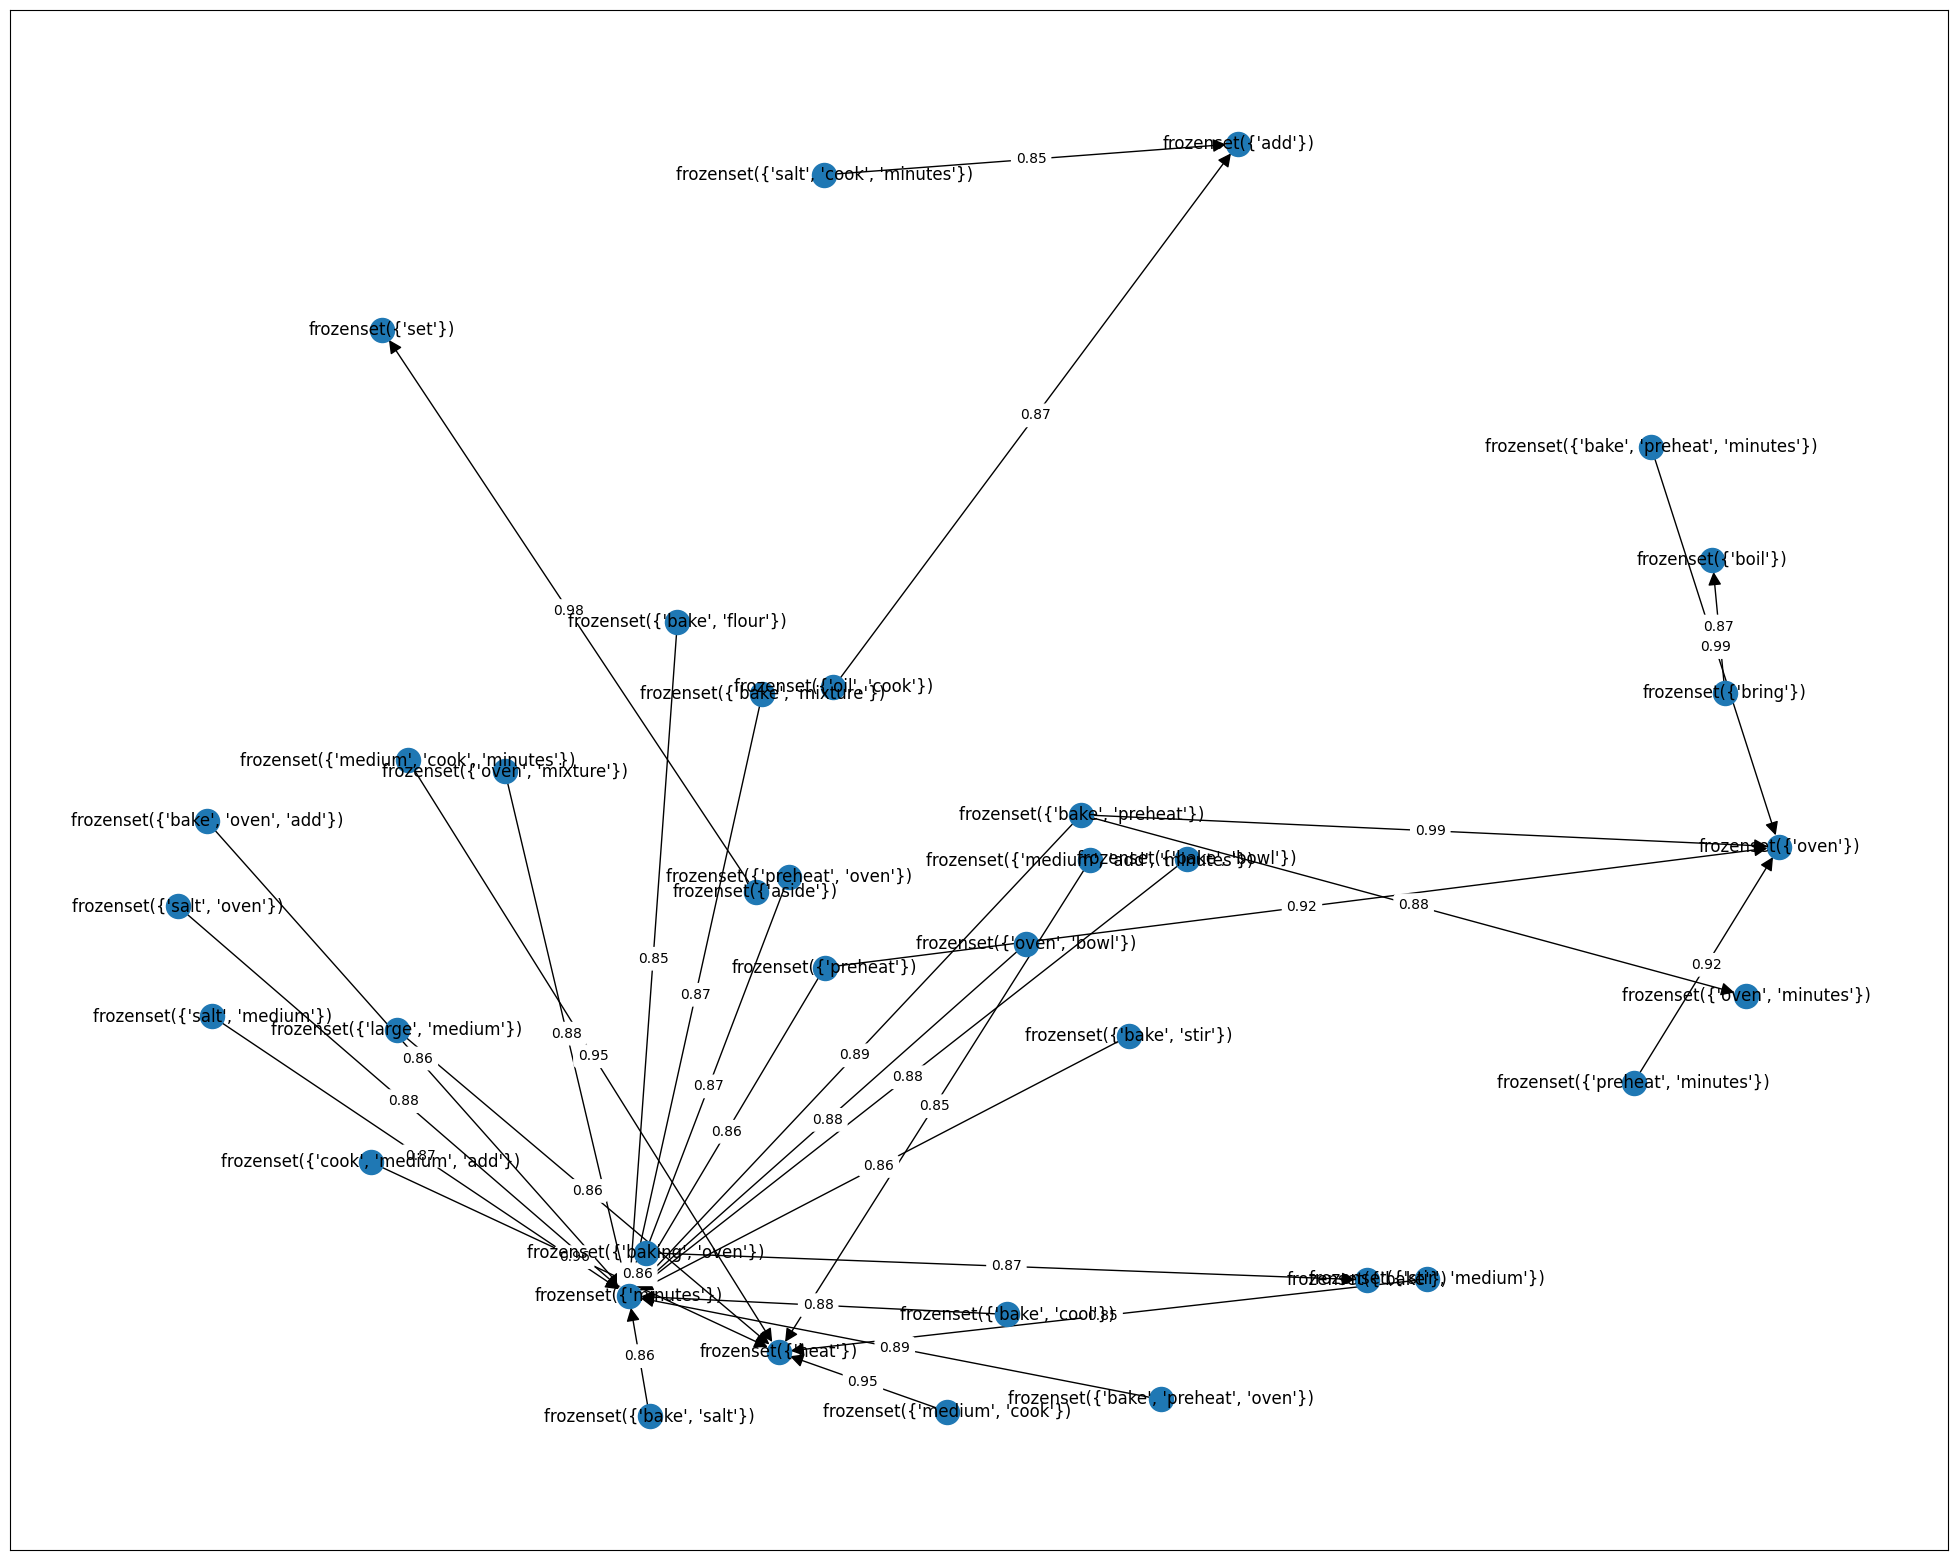

In [73]:
# Create a directed network graph of the association rules but this time using confidence as the edge weight.
# Also make the edges different color depending on how high the confidence is.

# Only consider rules with confidence greater than X
filtered_rules = rules[rules.confidence >= 0.85]

# Create an edges list (antedecent, consequent, {'w': confidence})
edges = [ (filtered_rules.iloc[i]['antecedents'], filtered_rules.iloc[i]['consequents'], {'w': round(filtered_rules.iloc[i]['confidence'],2)}) for i in range(len(filtered_rules))]

G = nx.DiGraph()
G.add_edges_from(edges)
pos=nx.spring_layout(G,k=0.75)
fig, ax = plt.subplots(figsize=(25, 20))
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges, arrowsize=20)
arc_rad = 0.1
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}', arrowsize=20)


edge_weights = nx.get_edge_attributes(G,'w')
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad)
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)
fig.savefig("3.png", bbox_inches='tight',pad_inches=0)